<a href="https://colab.research.google.com/github/Ajay07pandey/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_movie_and_TV_show_Clustering_Ajay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix movie and TV show Clustering



##### **Project Type**    - Unsupervised (NLP)
##### **Contribution**    - Individual
##### **Ajay pandey**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime as dt

import warnings 
warnings.filterwarnings('ignore')

# Import required libraries for NLP
from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

# Import required libraries from Sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Mounting google drive to drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df= pd.read_csv('/content/drive/MyDrive/Capstone project/Netflix movie and TV show Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"Cardiovascular Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

Cardiovascular Dataset: Rows= 7787, Columns= 12


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")

The total number of duplicated observations in the dataset: 0


It's good to see that we do not have any duplicated observation in our dataset.

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64%
--------------------------------------------------


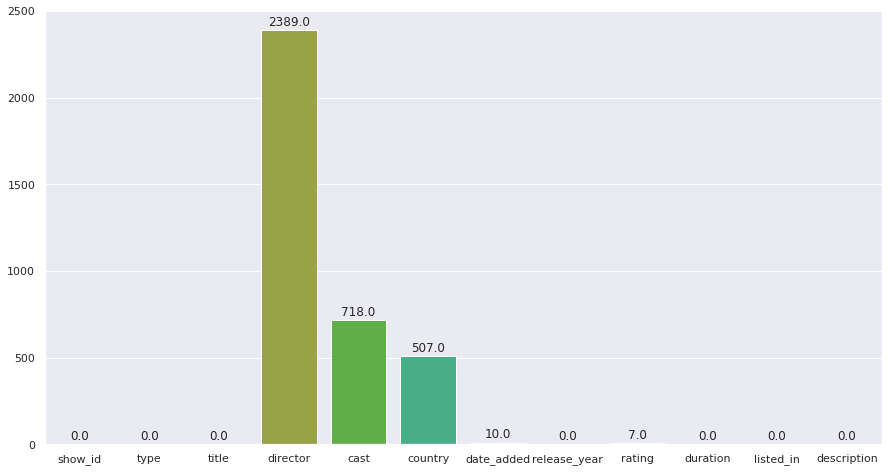

In [10]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x=df.columns,y=df.isna().sum())

for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [12]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

The number of unique values in: 
-----------------------------------
'show_id' : 7787
'type' : 2
'title' : 7787
'director' : 4049
'cast' : 6831
'country' : 681
'date_added' : 1565
'release_year' : 73
'rating' : 14
'duration' : 216
'listed_in' : 492
'description' : 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

####1.  Handling Null values from each feature

In [14]:
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Let's find out the percentage of null values in each category in order to deal with it.
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64%
--------------------------------------------------


In [15]:
df["date_added"].value_counts()

January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: date_added, Length: 1565, dtype: int64

In [16]:
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [17]:
df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

1. Since 'date_added' and 'rating' has very less percentage of null count so we can drop those observations to avoid any biasness in our clustering model.
2. We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high and we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown'.
3. We can fill null values of 'country' with mode as we only have 6% null values and most of the movies/shows are from US only.

In [18]:
## Imputing null value as per our discussion
# imputing with unknown in null values of director and cast feature
df[['director','cast']]=df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
df['country']=df['country'].fillna(df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
df.dropna(axis=0, inplace=True)

In [19]:
# Rechecking the Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Rechecking the percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64%
--------------------------------------------------


####2.  Handling nested columns i.e 'director', 'cast', 'listed_in' and 'country'

In [20]:
# Unnesting 'Directors' column
dir_constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = df['title']) 
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)

,title,Directors
1127,Boom,Kaizad Gustad
5286,Pocoyo Halloween: Space Halloween,Unknown
1761,Dawson's Creek,Unknown
2648,God's Not Dead,Harold Cronk
1569,Colin Quinn: The New York Story,Jerry Seinfeld
2067,Echcharikkai,Sarjun
1757,David Cross: Making America Great Again!,Alex Coletti
550,Angamaly Diaries,Lijo Jose Pellissery
732,Backdraft 2,Gonzalo López-Gallego
124,4th Man Out,Andrew Nackman


In [21]:
# Unnesting 'cast' column
cast_constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_constraint, index = df['title']) 
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

,title,Actors
26672,Longmire,Adam Bartley
46741,The Indian Detective,Hamza Haq
3418,American Factory: A Conversation with the Obamas,Michelle Obama
37268,Rim of the World,Benjamin Flores Jr.
46289,The Half Of It,Wolfgang Novogratz
7902,Borgen,Anders Juul
41870,StoryBots Super Songs,Gregg Spiridellis
20890,How to Train Your Dragon 2,Gerard Butler
54760,Well Done Abba,Yashpal Sharma
328,Òlòtūré,Patrick Doyle


In [22]:
# Unnesting 'listed_in' column
listed_constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(listed_constraint, index = df['title']) 
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)

,title,Genre
10690,Planet 51,Sci-Fi & Fantasy
6393,I'm Thinking of Ending Things,Dramas
3621,Dead to Me,TV Comedies
14409,The Letdown,International TV Shows
9589,Naa Bangaaru Talli,International Movies
13050,Tall Girl,Romantic Movies
7235,Kardec,International Movies
16482,Westerplatte Resists,Classic Movies
780,Aitraaz,Romantic Movies
13414,The Blazing Sun,International Movies


In [23]:
# Unnesting 'country' column
country_constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = df['title']) 
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

,title,Country
906,Barbie: The Princess & the Popstar,United States
5930,Porto,United States
7074,Sudden,Singapore
2523,Extinction,United States
1214,Blue Planet II,United Kingdom
4179,Krish Trish and Baltiboy: Comics of India,United States
3045,Goosebumps 2: Haunted Halloween,United Kingdom
1988,David Brent: Life on the Road,United States
6046,Pup Star: World Tour,Canada
7901,The Iron Lady,United Kingdom


Great, we have sucessfully separated the nested columns. Now let's just merge all the created dataframe into the single merged dataframe.

In [24]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
df7.head()

,title,Actors,Directors,Genre,Country
0,3%,João Miguel,Unknown,International TV Shows,Brazil
1,3%,João Miguel,Unknown,TV Dramas,Brazil
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil


Cool, now let's merge this dataframe with the original one on the left join to avoid information loss.

In [25]:
# Merging unnested data with the created dataframe in order to make the final dataframe
df = df7.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df.head()

,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...


#### 3. Typecasting of attributes

In [26]:
# Checking info of the dataset before typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   date_added    175807 non-null  object
 7   release_year  175807 non-null  int64 
 8   rating        175807 non-null  object
 9   duration      175807 non-null  object
 10  description   175807 non-null  object
dtypes: int64(1), object(10)
memory usage: 16.1+ MB


In [27]:
# Typecasting duration into integer
df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))

# Typecasting string object to datetime object of date_added column
df['date_added']= pd.to_datetime(df['date_added'])

# Extracting date, day, month and year from date_added column
df["day_added"]= df["date_added"].dt.day
df["month_added"]= df["date_added"].dt.month
df["year_added"]= df["date_added"].dt.year

# Dropping date_added
df.drop('date_added', axis=1, inplace=True)

In [28]:
# Checking info of the dataset after typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   release_year  175807 non-null  int64 
 7   rating        175807 non-null  object
 8   duration      175807 non-null  int64 
 9   description   175807 non-null  object
 10  day_added     175807 non-null  int64 
 11  month_added   175807 non-null  int64 
 12  year_added    175807 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 18.8+ MB


#### 4. Binning of Rating attribute

In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

**TV-MA**: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R**: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13**: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

**TV-14**: This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

**TV-PG**: This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

**NR**: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

**TV-G**: This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

**TV-Y**: This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

**TV-Y7**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

**PG**: This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

**G**: This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

**NC-17**: This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

**TV-Y7-FV**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

**UR**: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

Let's not complicate it and create bins as following:
* **Adult Content**: TV-MA, NC-17, R
* **Teen Content**: PG-13, TV-14
* **Family-Friendly Content** : 'TV-PG' , 'PG' , 'TV-G' , 'G'
* **Children's Content** : 'TV-Y' , 'TV-Y7' , 'TV-Y7-FV
* **Not Rated**: NR, UR

In [29]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Family-Friendly Content',
              'NR':'Not rated',
              'TV-G':'Family-Friendly Content',
              'TV-Y':"Children's Content",
              'TV-Y7':"Children's Content",
              'PG':'Family-Friendly Content',
              'G':'Family-Friendly Content',
              'NC-17':"Adult Content",
              'TV-Y7-FV':"Children's Content",
              'UR':'Not rated'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Family-Friendly Content',
       'Not rated', "Children's Content"], dtype=object)

In [30]:
# Checking head after binning
df.head()

,title,Actors,Directors,Genre,Country,type,release_year,rating,duration,description,day_added,month_added,year_added
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020


#### 5. Separating Movies and TV Shows

In [31]:
# Spearating the dataframes for further analysis
df_movies= df[df['type']== 'Movie']
df_tvshows= df[df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(126079, 13) (49728, 13)


### What all manipulations have you done and insights you found?

We have divided data wrangling into five different sections:
1. In this section we have imputed/drop the null values of:
  * Imputed 'director' and 'cast' with 'Unknown'.
  * Imputed 'country' with Mode.
  * Drop null values of 'date_added' and 'rating' (less percentage).
2. We have unnested values from following features:
    * 'director'
    * 'cast'
    * 'listed_in'
    * 'country'

    We have unnested the values and stored in different dataframes and then  merged all the dataframe with the original one using left join in order to get the isolated values of each of the feature.
3.* We have typecasted the following features:
    * 'duration' into integer (Removing min and seasons from the values).
    * 'date_added' to datetime (Into the required format).
  * We have also extracted the following features:
    * 'date' from 'date_added'.
    * 'month' from 'date_added'.
    * 'year' from 'date_added'.
4. We have seen that the 'rating' column contains various coded categories, so  we have decided to create 5 bins and distribute the values accordingly:
    * **Adult**: TV-MA, NC-17
    * **Restricted**: R, UR
    * **Teen**: PG-13, TV-14
    * **All Ages**: TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG
    * **Not Rated**: NR
5. Lastly we have splitted the dataframe into two df one is 'df_movies' that contains only Movies and the other is 'df_tvshows' that contains only TV Shows for our further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (What is the relative percentage of total number of Movies and TV Shows over Netflix?)

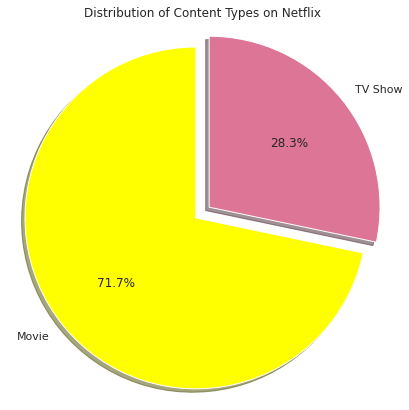

In [32]:
# Create a DataFrame of the count of each unique value in the 'type' column
type_counts = df['type'].value_counts()
plt.figure(figsize=(7,7))
# Create a pie chart of the 'type' column
plt.pie(type_counts, labels=type_counts.index,colors=['yellow','#DD7596'],explode=(0, 0.1),shadow=True, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Content Types on Netflix')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us the percent of TV shows and movie data present on Netflix Data set

##### 2. What is/are the insight(s) found from the chart?

1. We can see that the majority of the content on Netflix is movies, which account for around two-thirds of the total content. TV shows make up the remaining one-third of the content.

2. we can conclude that in the given Data set only 28.3% are TV Shows and 71.7% are Movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Yes! the production house should more focus on quality movies because there is high competition in the market.

2. TV Shows are less in numbers hence good opportunity for business.

#### Chart - 2 (How content is distributed over Netflix?)

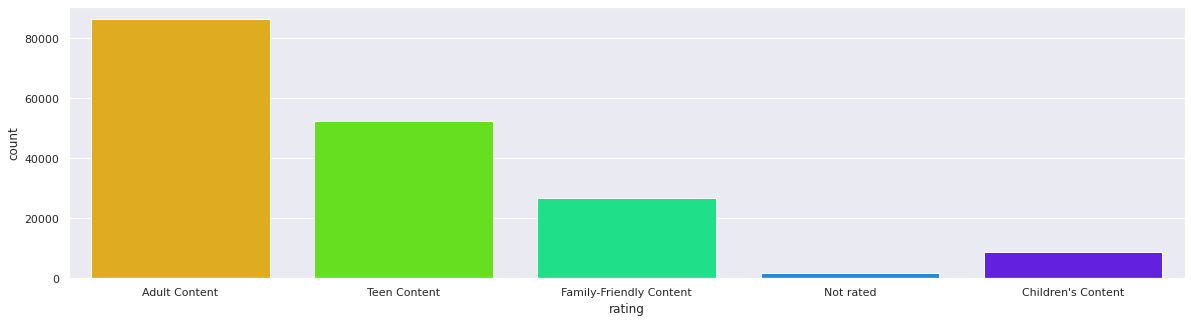

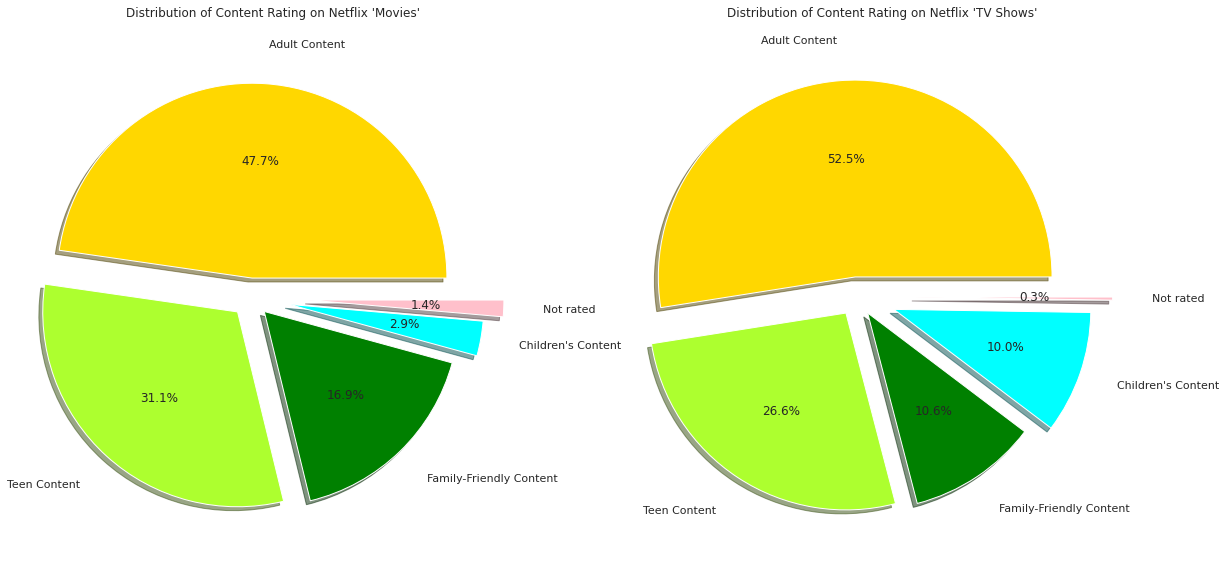

In [33]:
plt.figure(figsize=(20,5))
sns.countplot(x='rating',data=df,palette = 'gist_rainbow')

plt.figure(figsize=(20,10))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  count= i['rating'].value_counts()
  plt.pie(count, labels=count.index,explode=(0.1,0.1,0.1,0.2,0.3),colors=['Gold','GreenYellow','Green','Cyan','Pink'],shadow=True, autopct='%1.1f%%', labeldistance=1.2)
  plt.title(f"Distribution of Content Rating on Netflix '{j}'")
  plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

We chosen this chart to know the percentage of type of content present in the Netflix.

##### 2. What is/are the insight(s) found from the chart?

1.We found that most of the content present in the Netflix belongs to Adult and teen the categories.

2.Another important insight we can see that **Family friendly content** less in Movies compared to TV Shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1.For high gains production house should more focus on Teen and Adult content.

2.There is good chances of growth in Family-friendly category in TV Shows

#### Chart - 3 (Who are the top actors performing in Movies and TV Shows?)

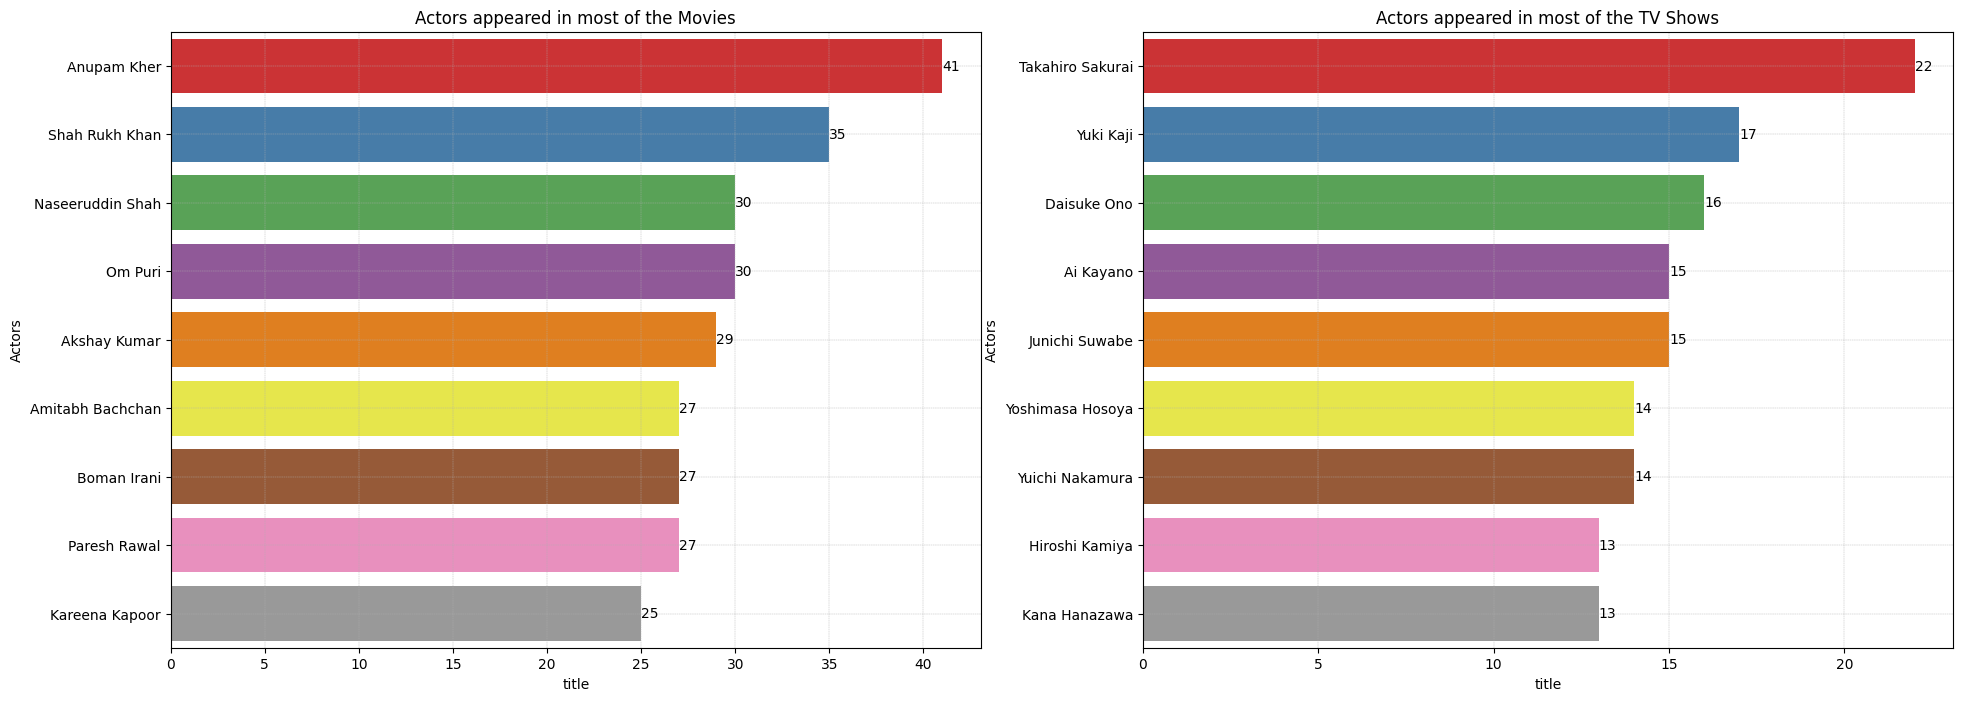

In [34]:
# Top 10 casts in Movies and TV Shows
plt.style.use('default')
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_actor = i.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Actors",x = 'title', data = df_actor, palette='Set1')
  plt.title(f'Actors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which actors are more popular on Netflix.

##### 2. What is/are the insight(s) found from the chart?

1. We found an interesting insight that most of the Actors in Movies are from INDIA.

2. No popular actors from india in TV Shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Indians are movie lover, they love to watch movies hence business should target indian audience for Movies.

#### Chart - 4 (Who are the top Directors directing Movies and TV Shows?)

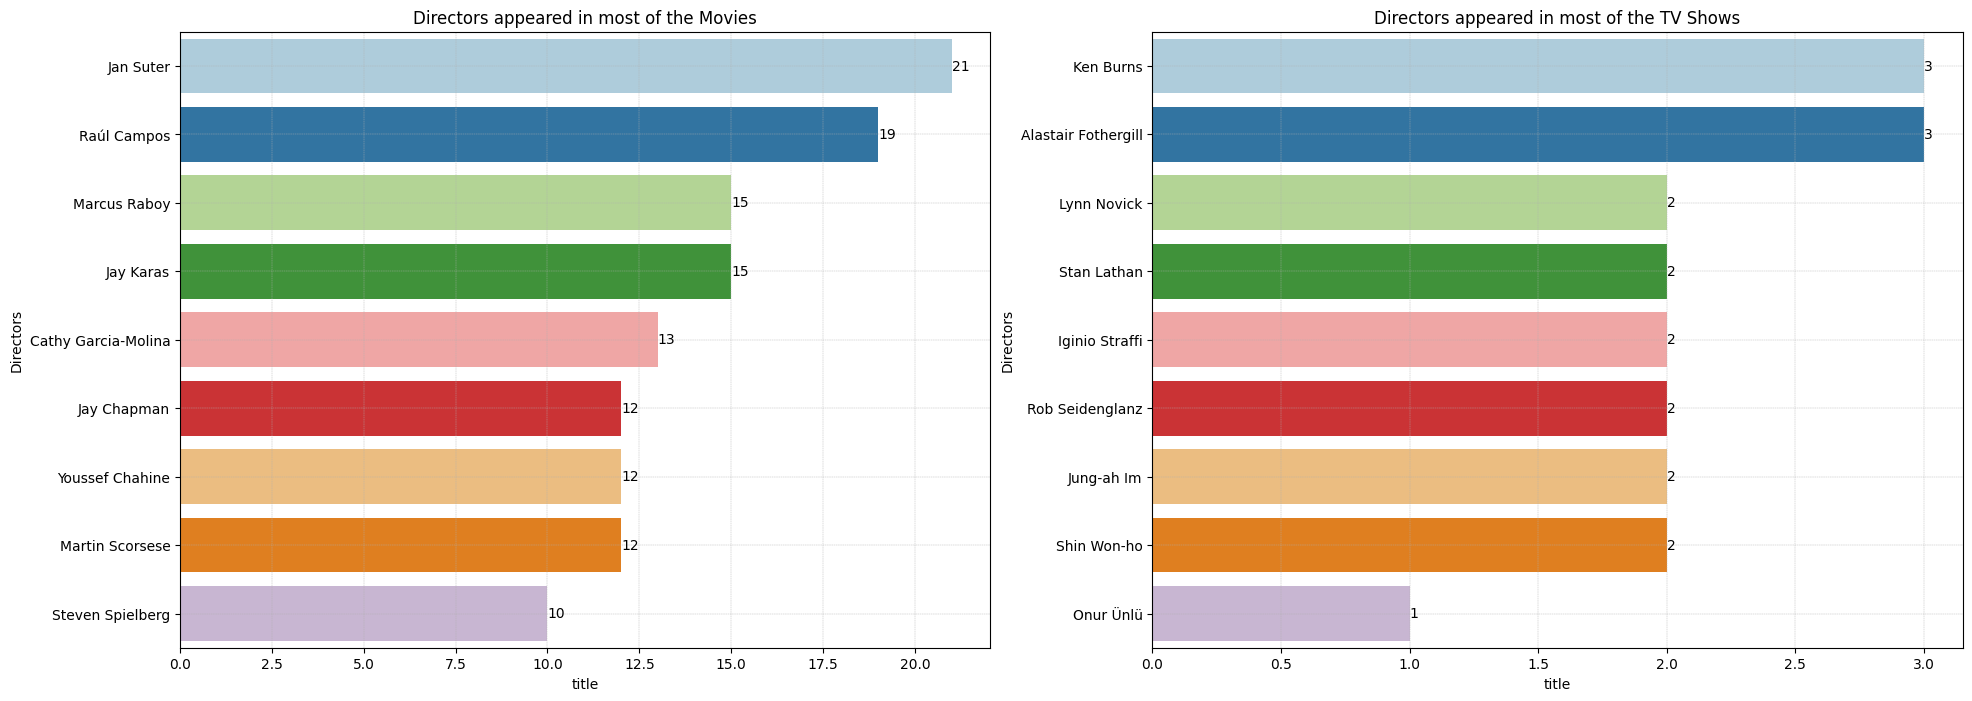

In [35]:
# Top 10 Directors in Movies and TV Shows
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Directors",x = 'title', data = df_director, palette='Paired')
  plt.title(f'Directors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which director is popular in Movies and which one is popular in TV Shows.

##### 2. What is/are the insight(s) found from the chart?

1. We found that most of the movies directed by **jan suter**.

2. Most TV shows directed by **ken burns**.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Movie/tvshows producers can select the popular director for their upcoming projects

#### Chart - 5 (What are the top 10 Countries involved in content creation?)

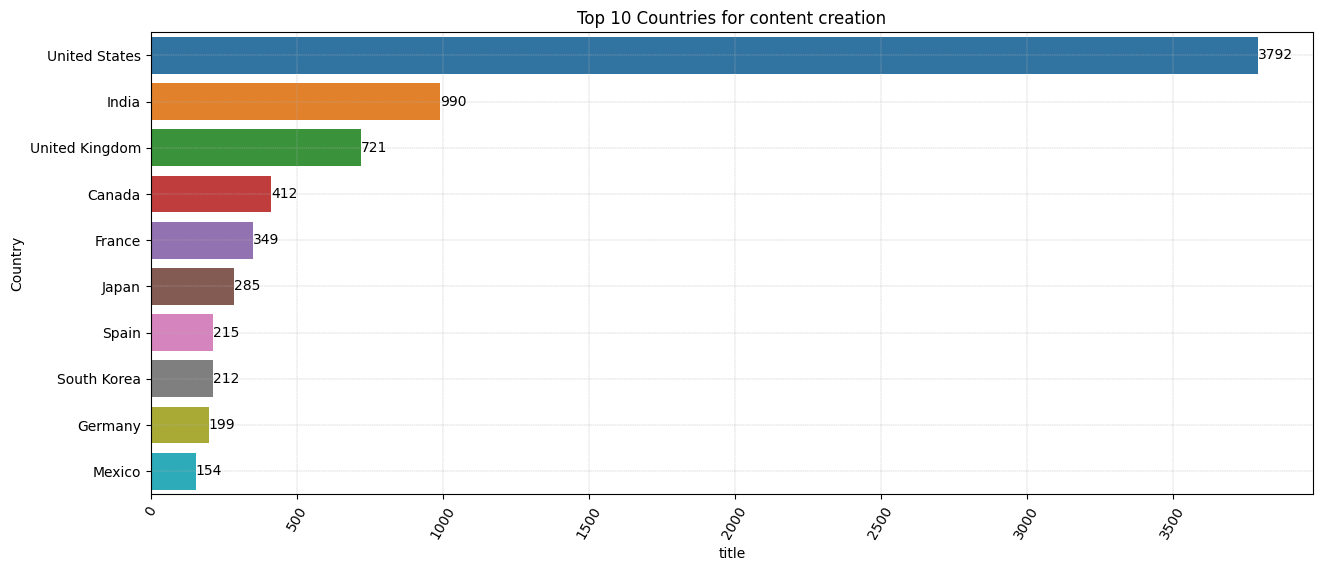

In [36]:
df_country = df.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "Country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which country produces Maximum number of TV Shows and Movies.

##### 2. What is/are the insight(s) found from the chart?

1. The United States is the top country producing both movies and TV shows on Netflix. This suggests that Netflix is heavily influenced by American content.

2. India is the second-highest producer of movies on Netflix, indicating the growing popularity of Bollywood movies worldwide.

3. Country like canada, france, japan also have significant presence in the data set showing diversity of content on the netflix.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Indian content is showing popularity in netflix, Indian directors should also dub movies in multiple language to capture more audience. 



#### Chart - 6 (Which Countries has the highest spread of Movies and TV Shows over Netflix)

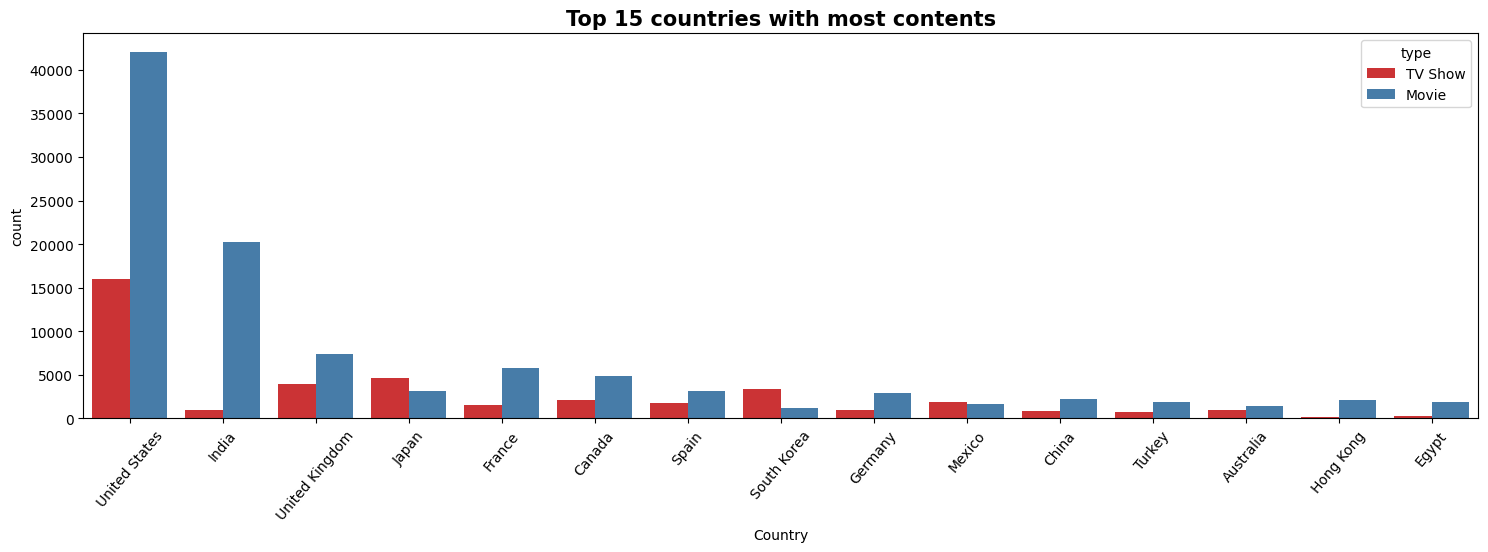

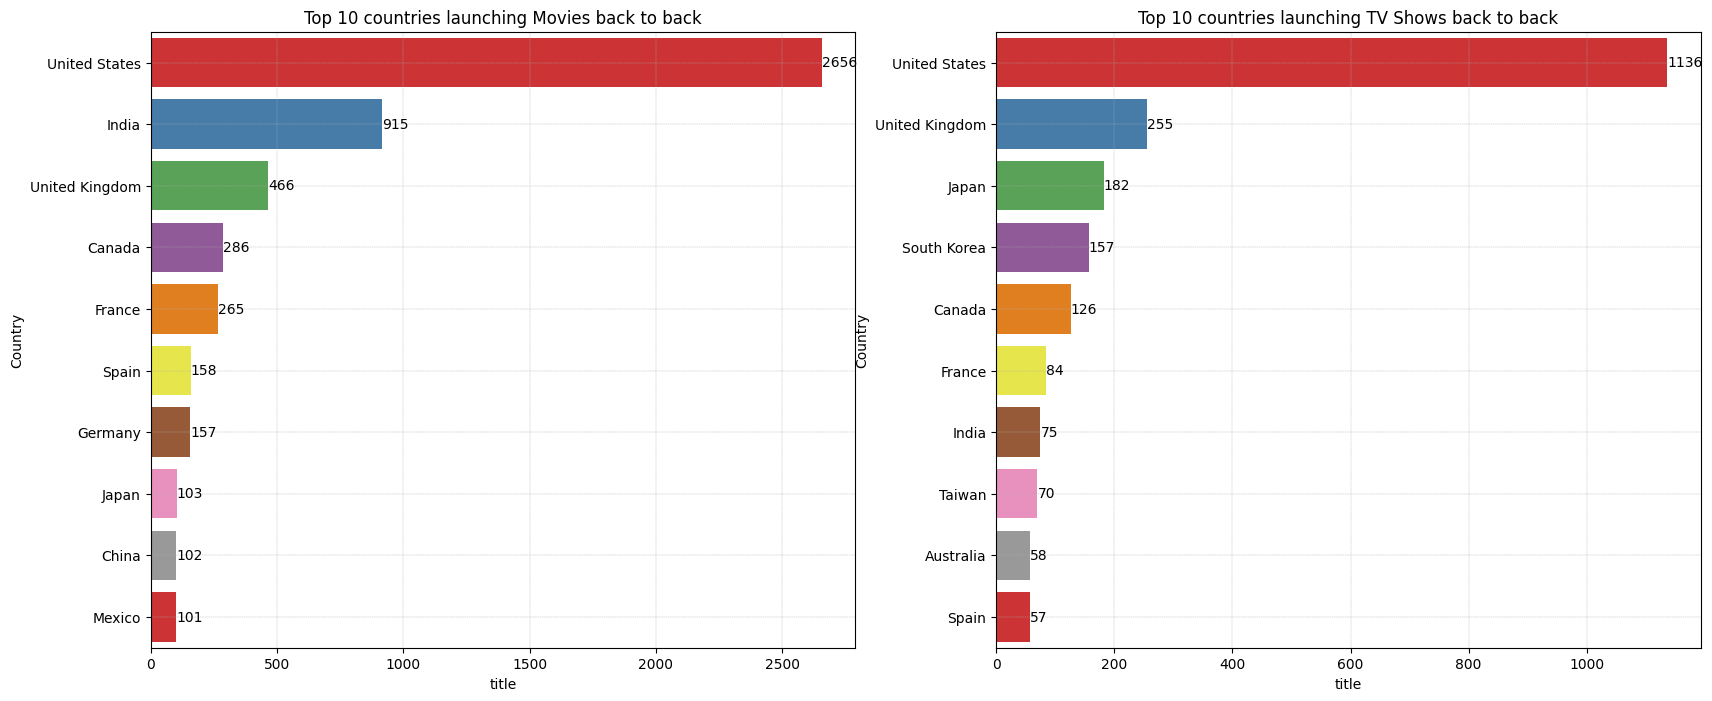

In [37]:
#Analysing top15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=df['Country'],order=df['Country'].value_counts().index[0:15],hue=df['type'],palette ="Set1")
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

plt.figure(figsize=(20,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Country",x = 'title', data = df_country, palette='Set1')
  plt.title(f'Top 10 countries launching {j} back to back')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which country produces which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

1. INDIA Produces most amount of Movies in compare to TV Shows.

2. Japan and South korea produces more TV Shows in compare to Movies.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 (Which Genres are Popular in Netflix)

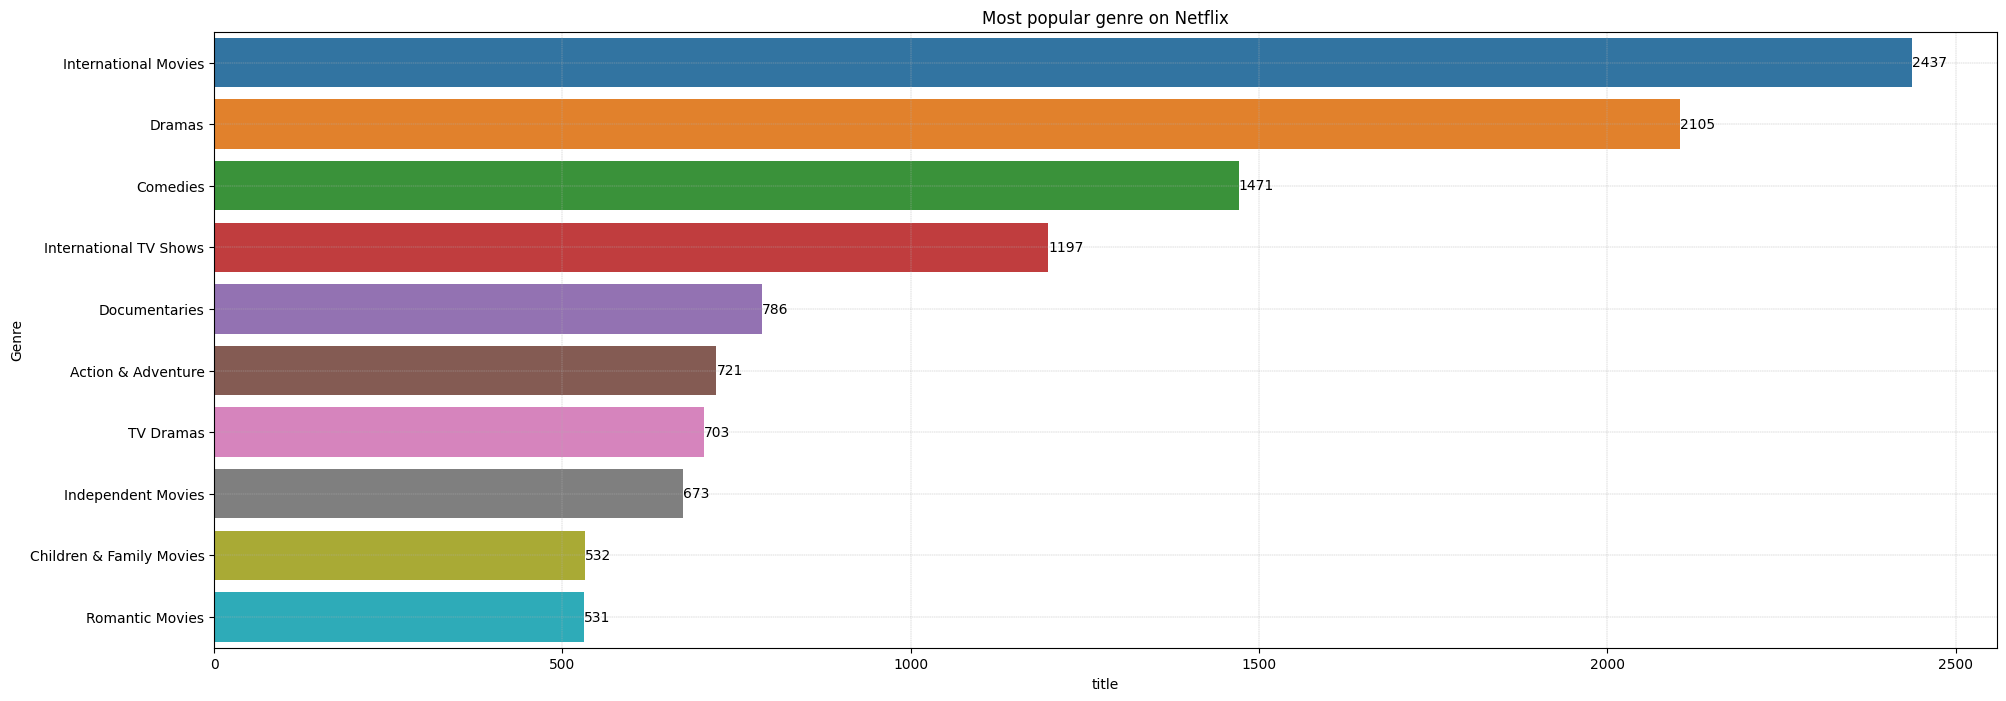

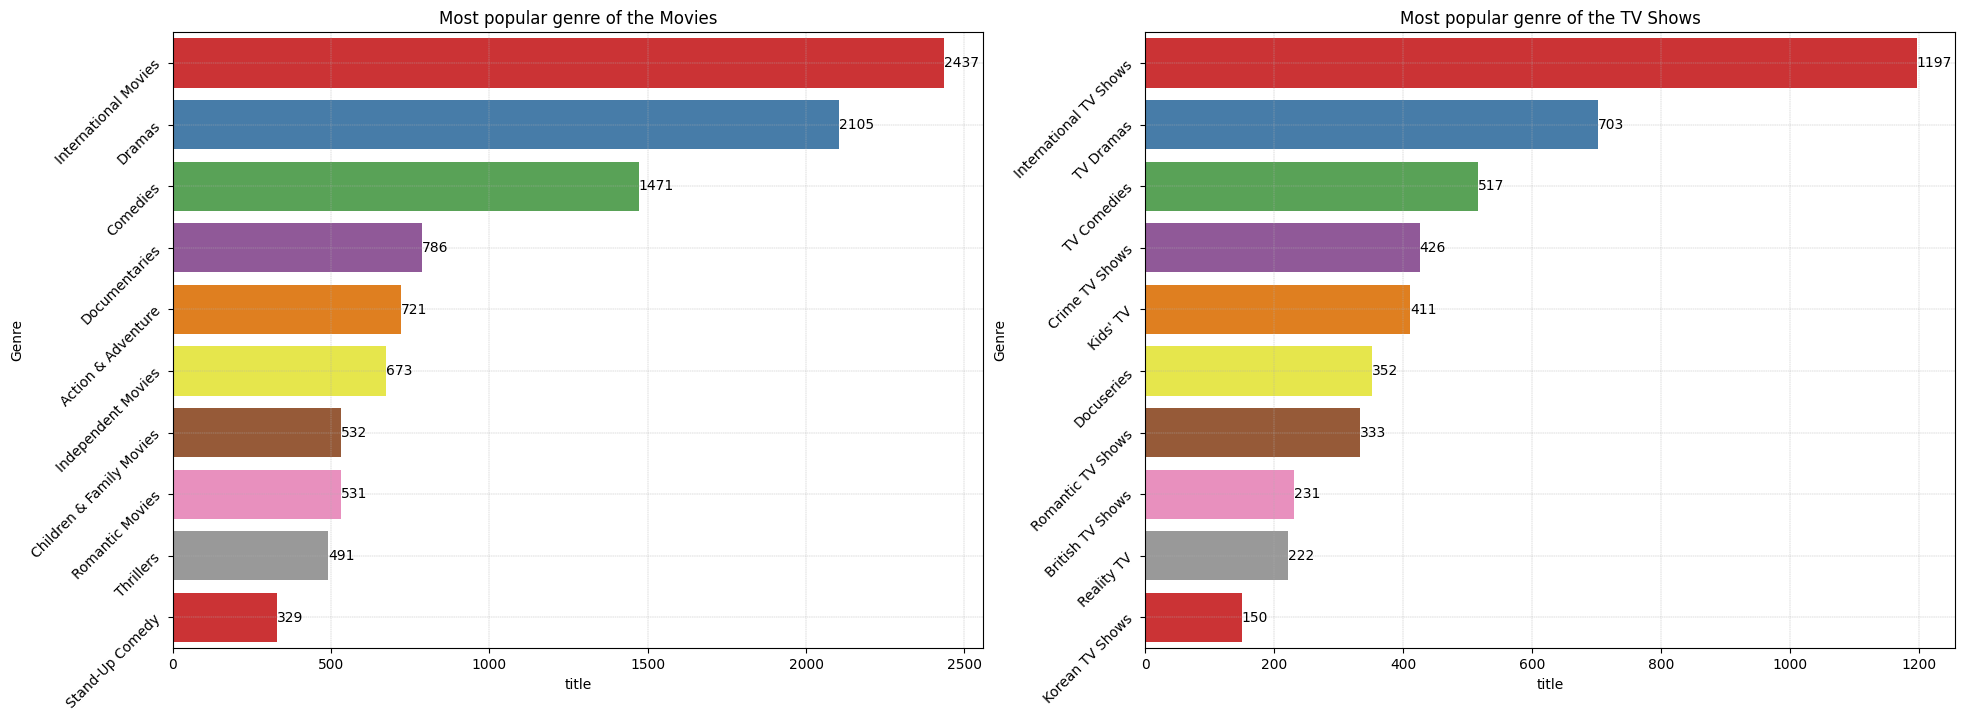

In [38]:
plt.figure(figsize=(23,8))
df_genre = df.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plots= sns.barplot(y = "Genre",x = 'title', data = df_genre)
plt.title(f'Most popular genre on Netflix')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_genre = i.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Genre",x = 'title', data = df_genre, palette='Set1')
  plt.title(f'Most popular genre of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
  plt.yticks(rotation = 45)
plt.show()

##### 1. Why did you pick the specific chart?

This graph tells us which genre is most popular in Netflix.

##### 2. What is/are the insight(s) found from the chart?

1. International movies genre is most popular in both the TV Shows and Movies category. Followed by **Drama** and **comedy**.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 (Total Number of Movies/TV Shows added per year on Netflix)

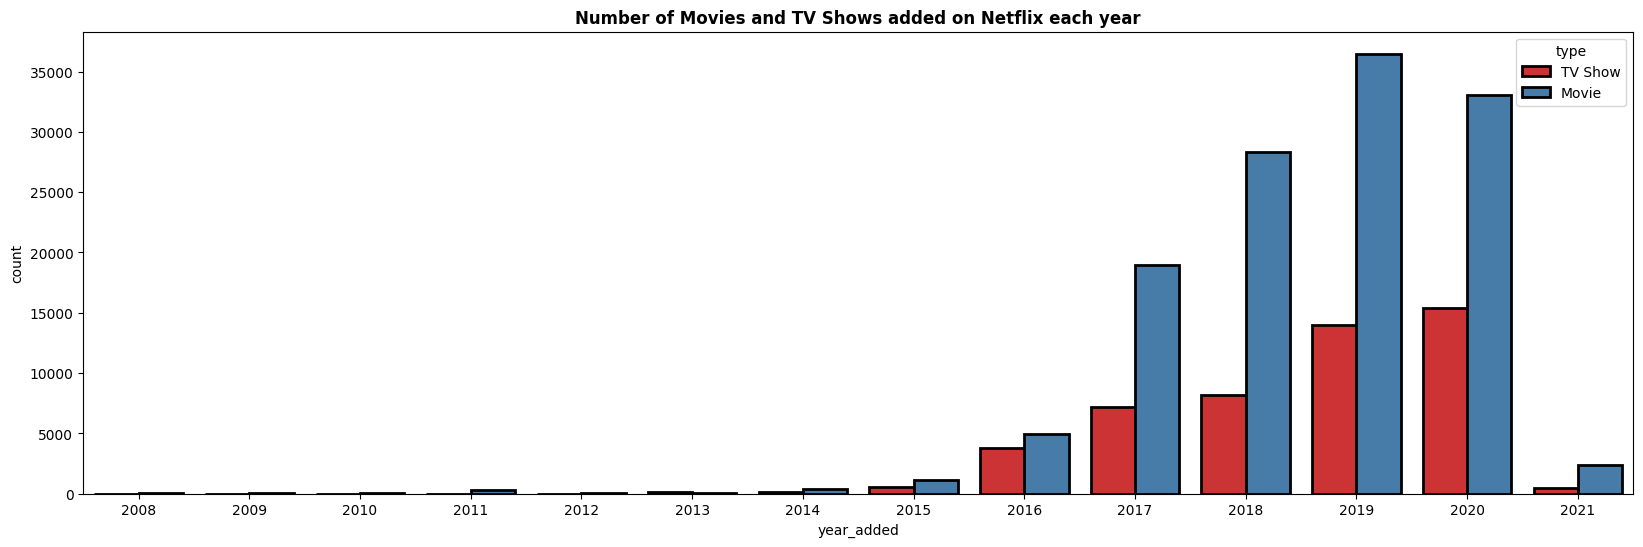

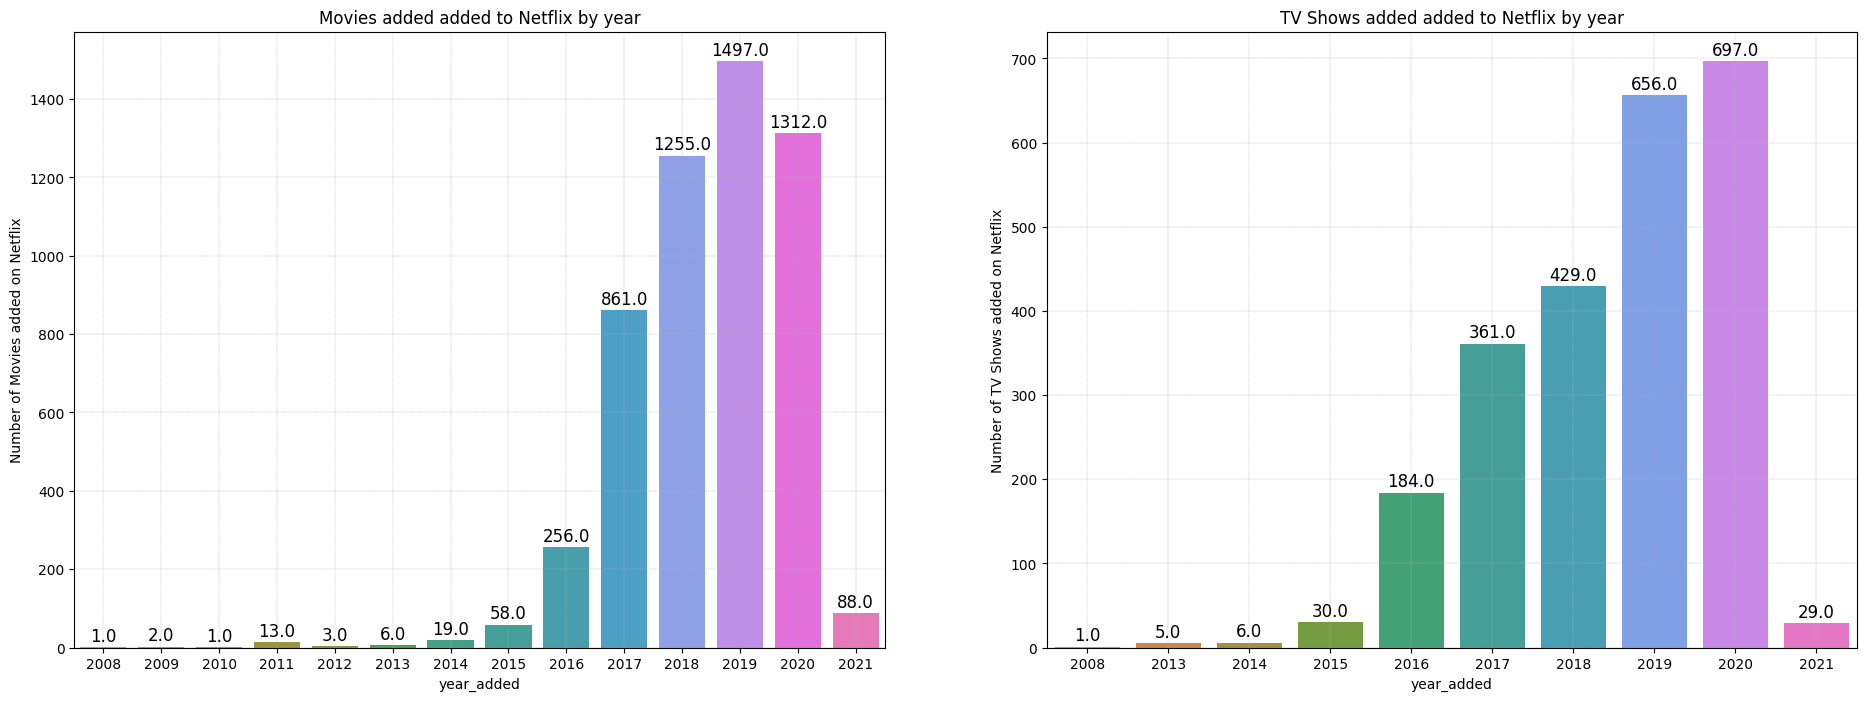

In [39]:
fig, ax = plt.subplots(figsize=(20,6))
sns.countplot(x='year_added', hue='type',lw=2, data=df, ax=ax,edgecolor='black',palette="Set1")
plt.title("Number of Movies and TV Shows added on Netflix each year",fontweight="bold")

plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
  plots= sns.barplot(x = 'year_added',y= 'title', data = df_country, palette='husl')
  plt.title(f'{j} added added to Netflix by year')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us how many  movies and TV Show added/released in a year.

##### 2. What is/are the insight(s) found from the chart?

We found that movie/tv shows released/added increases year by year until it reaches peak in 2022 and then some downfall seen.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 (Total Number of Movies/TV Shows added per month on Netflix)

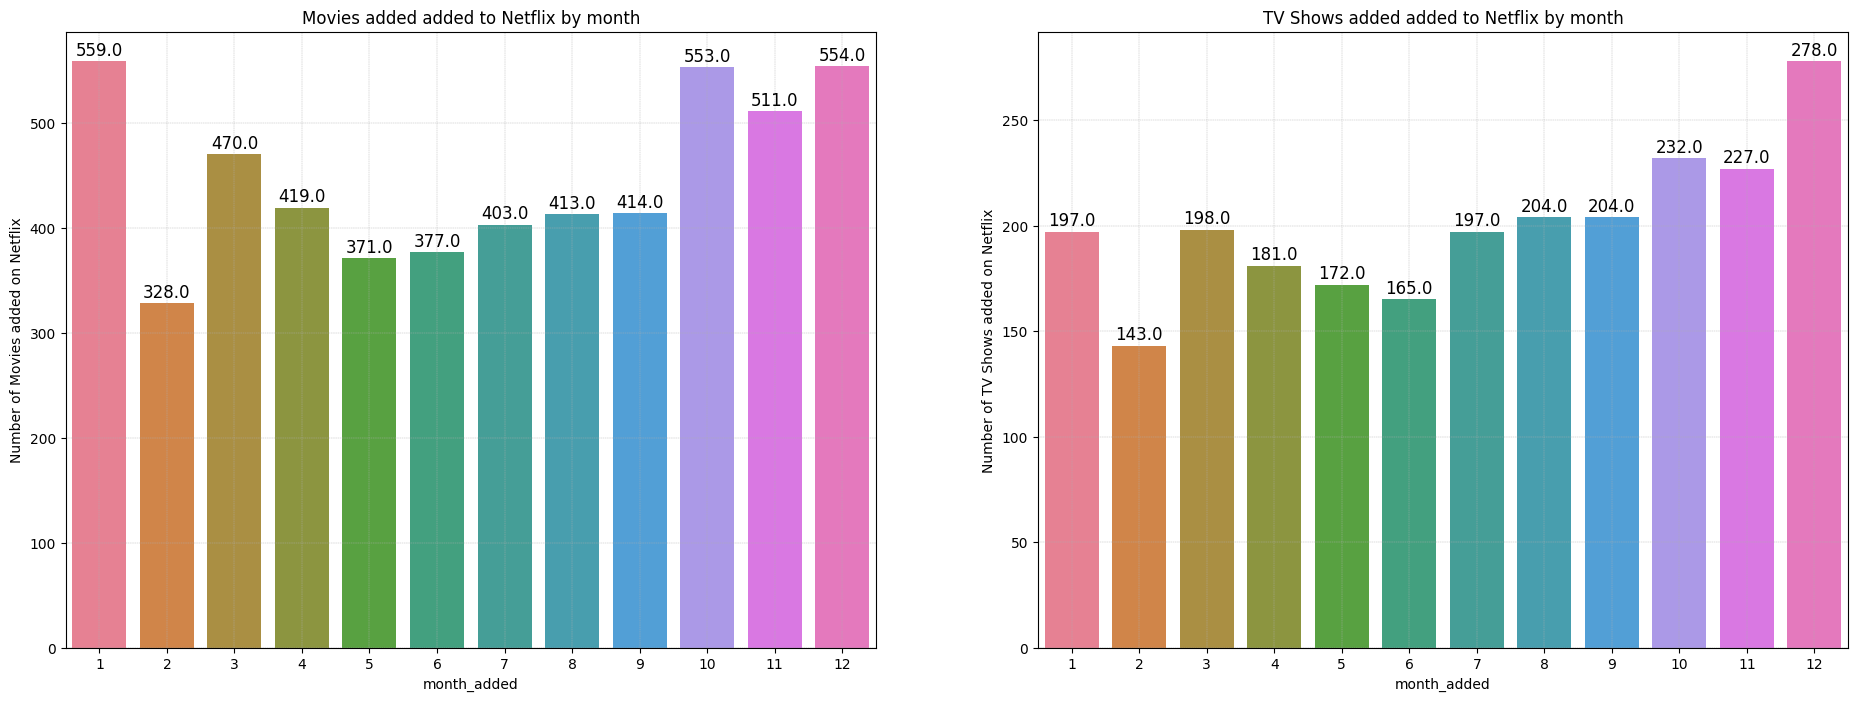

In [40]:
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_month = i.groupby(['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['month_added'],ascending=False)
  plots= sns.barplot(x = 'month_added',y='title', data = df_month, palette='husl')
  plt.title(f'{j} added added to Netflix by month')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

We have plotted this graph to know in which month the movie/tv shows added is **maximum** and in which year **minimum**.

##### 2. What is/are the insight(s) found from the chart?

1. We found that October, November, December month has heighest TVshows added in netflix.

2. Month of january,october,november is more popular for movie addition.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 (Total Number of Movies/TV Shows added per day on Netflix)

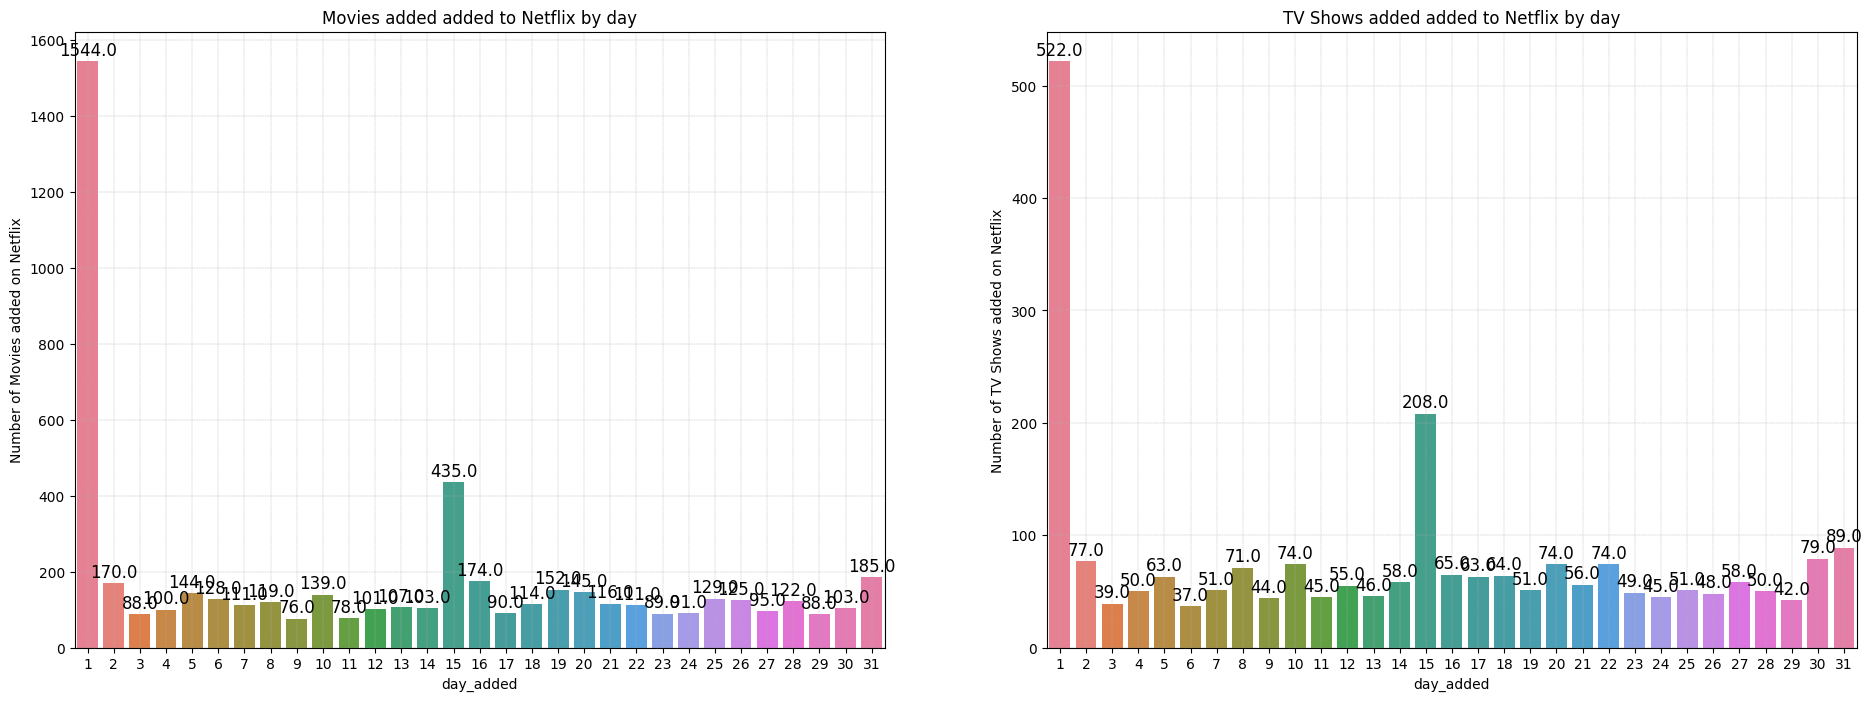

In [41]:
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_day = i.groupby(['day_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['day_added'],ascending=False)
  plots= sns.barplot(x = 'day_added',y='title', data = df_day, palette='husl')
  plt.title(f'{j} added added to Netflix by day')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us the day when most of the movies added in a month.

##### 2. What is/are the insight(s) found from the chart?

1. Here we can see that most of the Movies released in starting of the month followed by mid of month.

2. Same pattern can be seen in the TV Shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As a movie producer they have to launch the movies in the starting of the month. At that time peoples have enough money to spend and family time to watch movies.

#### Chart - 11 (What is the Rate of Movies/TV Shows adding per day, month and year on Netflix?)

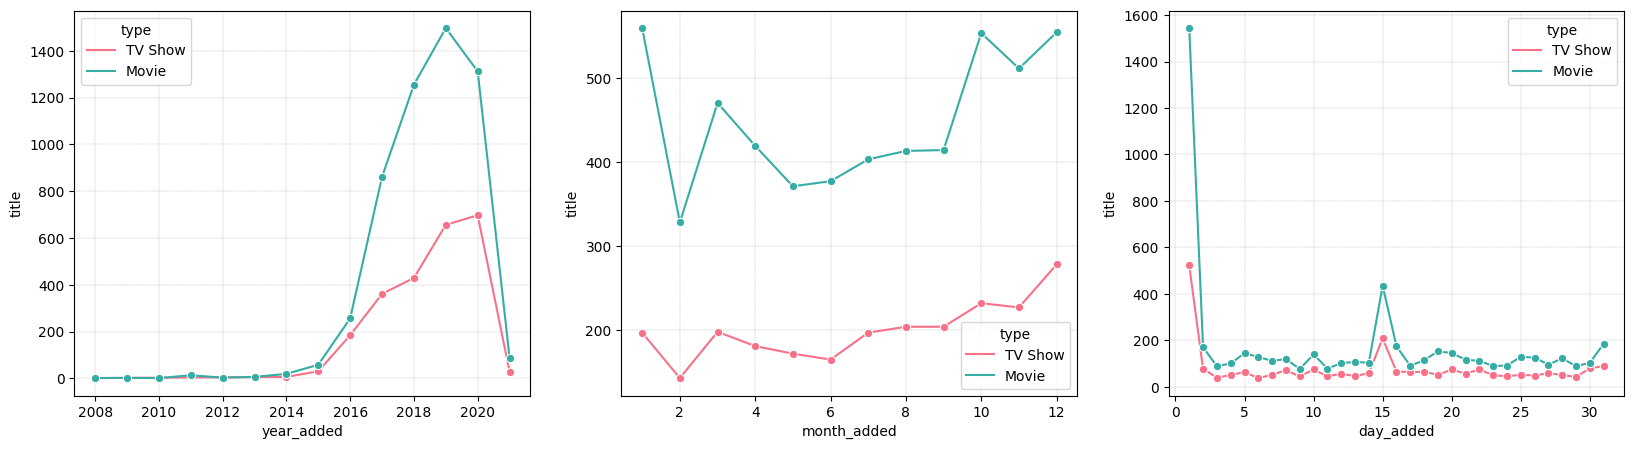

In [42]:
interval= ['year_added','month_added','day_added']
plt.figure(figsize=(20,5))
for i,j in enumerate(interval):
  plt.subplot(1,3,i+1)
  df_interval = df.groupby([j,'type']).agg({'title':'nunique'}).reset_index().sort_values(by=[j],ascending=False)
  sns.lineplot(x = j,y='title', data = df_interval, palette = 'husl', hue = df_interval['type'], marker = 'o')
  plt.grid(linestyle='--', linewidth=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us the variation of Movies/TV Shows added in month, day, Year.

##### 2. What is/are the insight(s) found from the chart?

1. Here we can see that during covid times in the year 2019 the movie addition increased rapidly and reaches its peak.

2. The movie/tvshows added in Netflix is maximum in the weekends, we can see peak in the interval of 6th day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Producers should target the audience in weekends and during festival month for more revenue.

#### Chart - 12 (What is the Month-wise number of content added in each year on Netflix?)

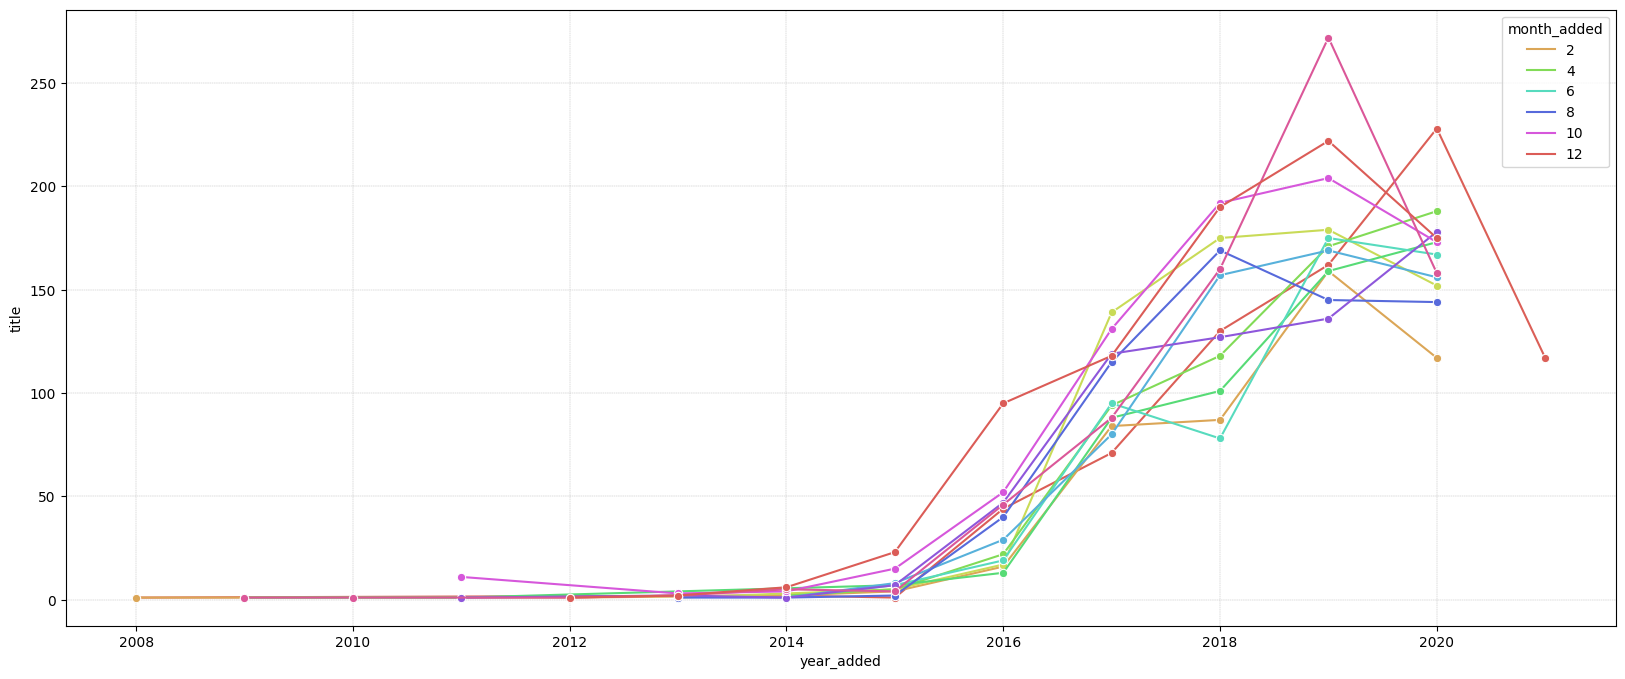

In [43]:
plt.figure(figsize=(20,8))
df_year_month = df.groupby(['year_added','month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x = 'year_added',y='title', data = df_year_month, palette = 'hls', hue=df_year_month['month_added'], marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

This graph helps us in knowing which month is dominating in adding movie/tvshows in a year.

##### 2. What is/are the insight(s) found from the chart?

1.   We can see that there is no specific trend is followed, Instead of this some consecutive years shows month wise trend.

2. From 2008 to 2009 we see movies added in the month of February, and from 2009  to 2011 movies added in the month of February and October.

3. After 2015 majority content added in the month of october to december

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Producers should add there movies in the month when audience is more responsive.

2. Although no specific trend is shown but most movies should be uploaded in year end with some discount in the subscription.

#### Chart - 13 (What is the Day-wise number of content added in each year on Netflix?)

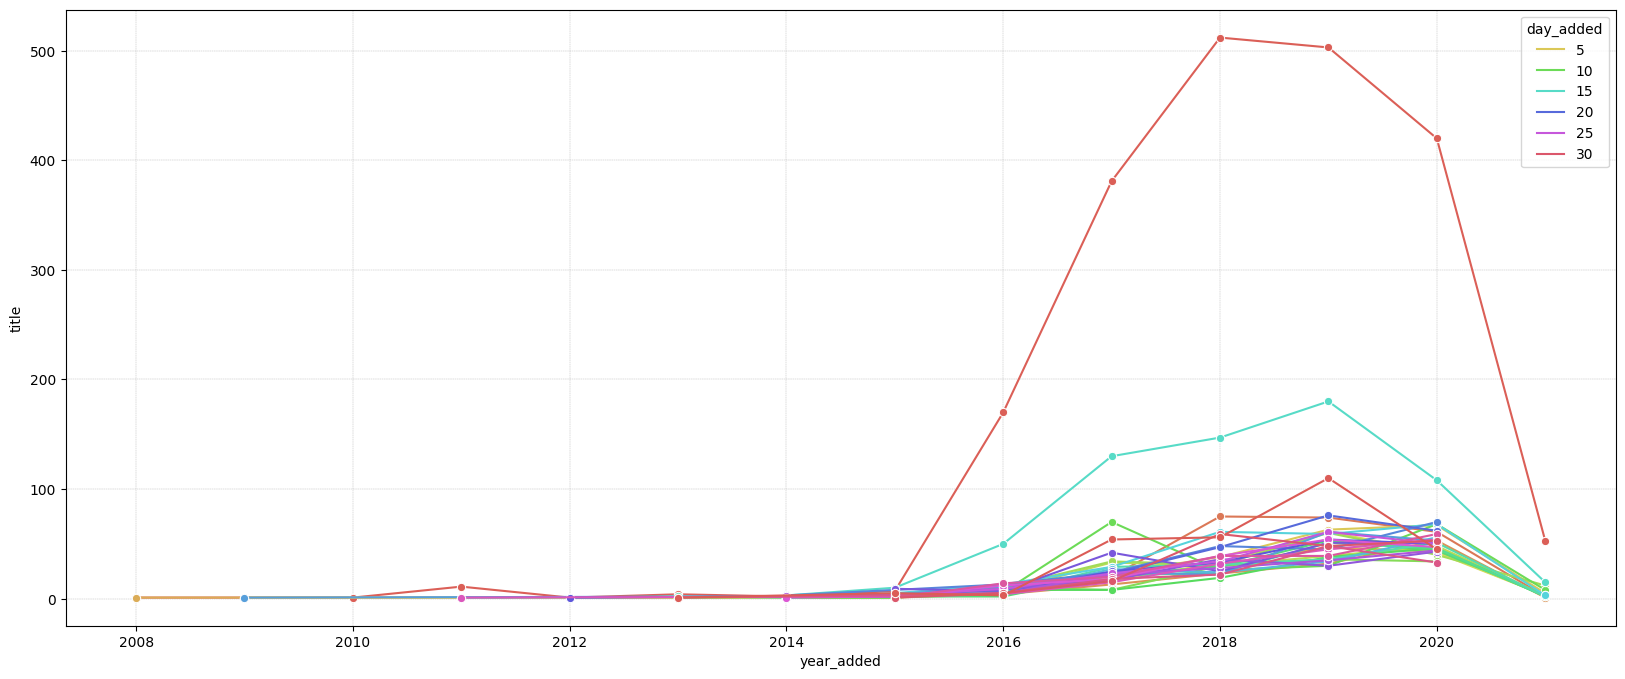

In [44]:
plt.figure(figsize=(20,8))
df_year_month = df.groupby(['year_added','day_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x = 'year_added',y='title', data = df_year_month, palette = 'hls', hue=df_year_month['day_added'], marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

This graph help us in knowing which day is more frequent in movie addition year wise.

##### 2. What is/are the insight(s) found from the chart?

1. Movies from 2008 to 2009 added on 5th day of the month.
2. Movies from 2009 to 2010 added on 15th day of the month.
3. Most of the movies from 2010 to 2012 added in the month end.
4. From 2015 onwords most of the movies are added in month end or mid month.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Currently most of the movies are added in 15th day of month or at the last day of month, so before releasing the movies consider this trend also.

#### Chart - 14 - (What is the Distribution of Content Rating in each highest content creating countries?)

KeyError: ignored

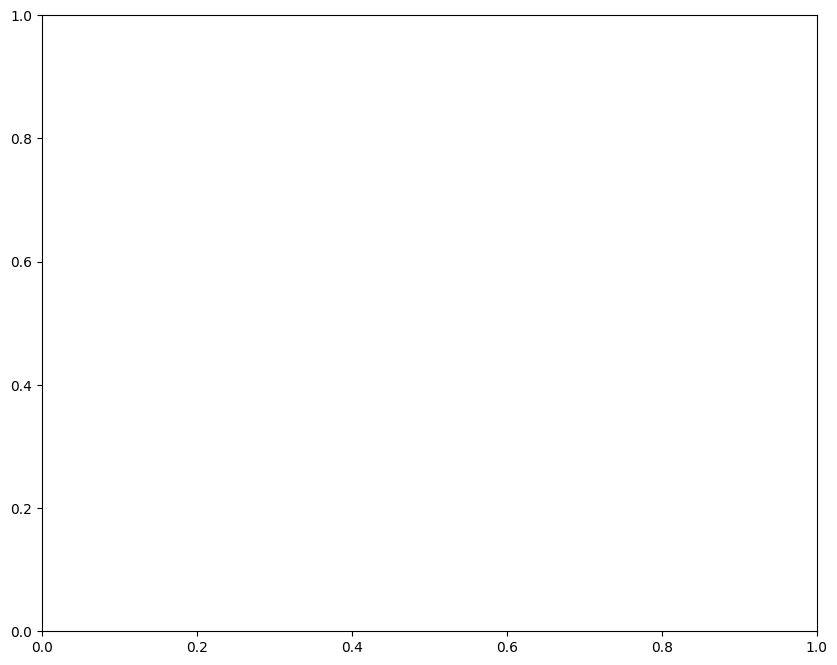

In [45]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('Country')[['Country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['Country']
df_heatmap = df.loc[df['Country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['Country'],df_heatmap['rating'],normalize = "index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Defining order of representation
country_order = ['United States','India','United Kingdom','Canada','France','Japan','Spain','South Korea','Germany', 'Mexico']
rating_order = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# calling and plotting heatmap
sns.heatmap(df_heatmap.loc[rating_order,country_order], cmap='Set2', square=True,linewidth=2.5,cbar=False,annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 (What is the Distribution of Duration of contents over Netflix?)

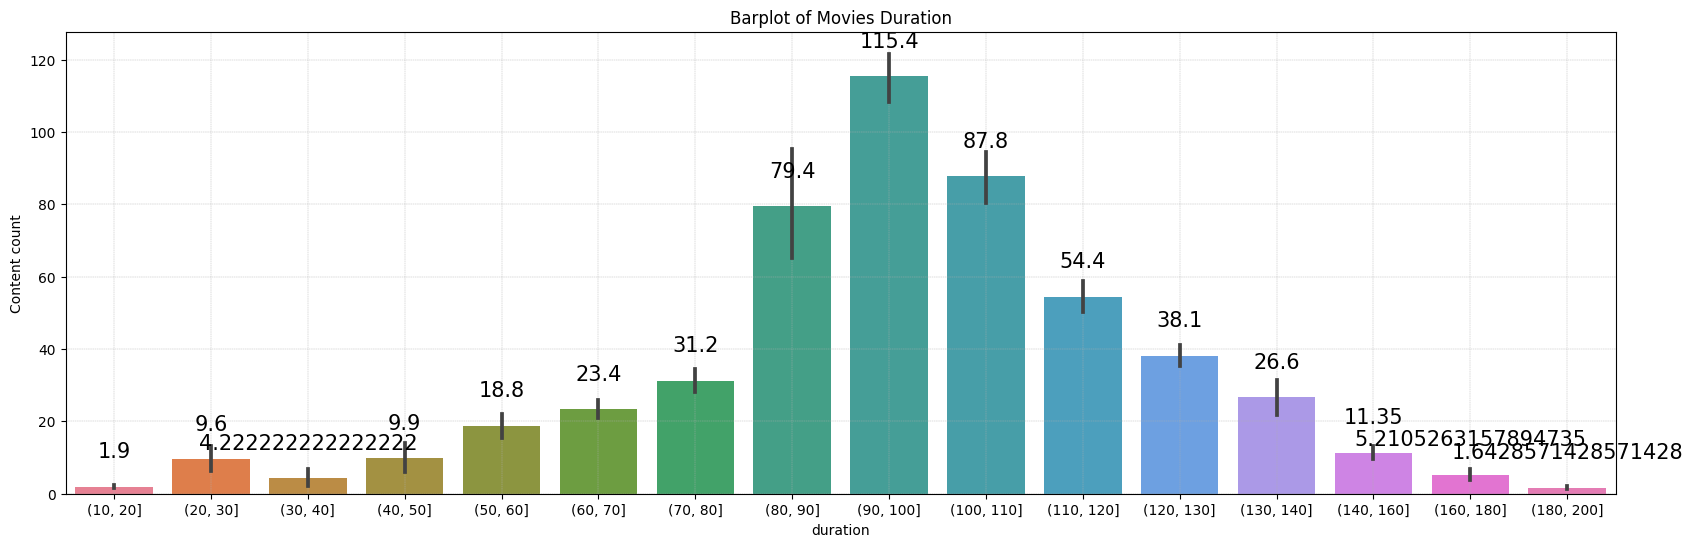

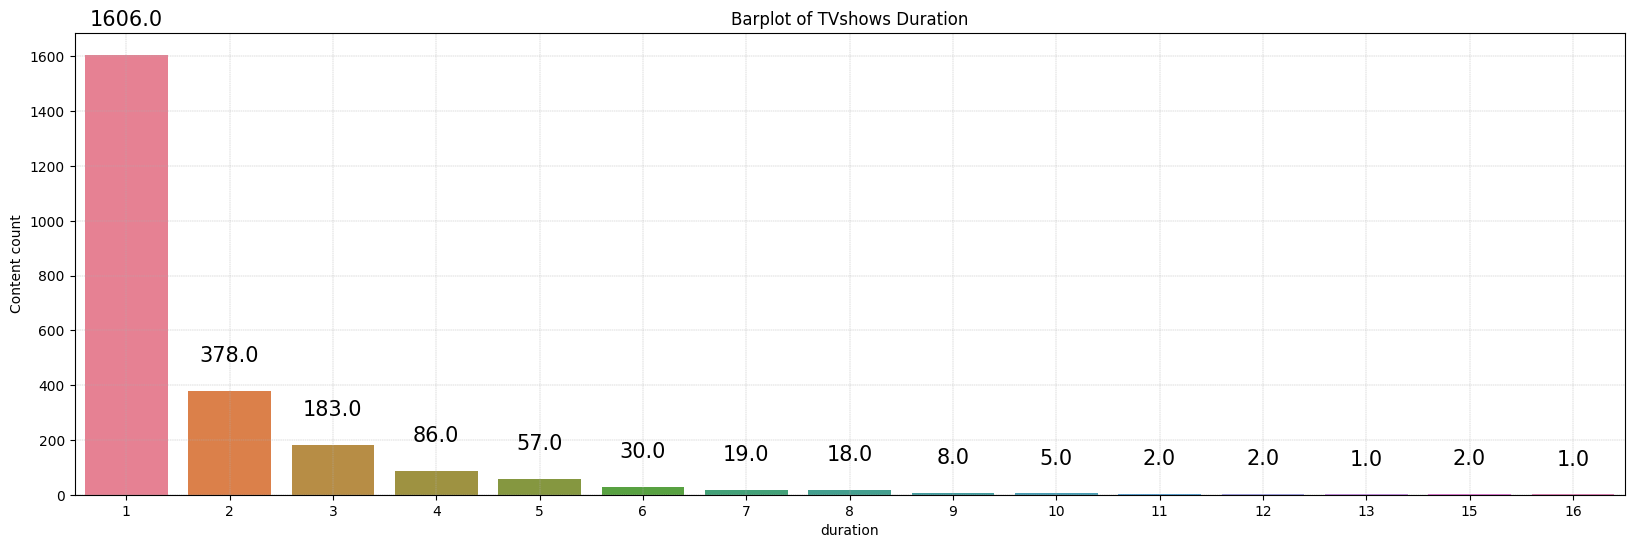

In [46]:
from numba import none
plt.figure(figsize=(20,6))
df_duration = df_movies.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['duration'],ascending=False)
df_duration['duration'] = pd.cut(df_duration['duration'], bins=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,160,180,200])
plots= sns.barplot(x = 'duration',y='title', data = df_duration, palette='husl')
plt.title(f'Barplot of Movies Duration')
plt.ylabel(f"Content count")
plt.grid(linestyle='--', linewidth=0.3)
for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='bottom',
                    size=15, xytext=(0,18),
                    textcoords='offset points')
     
from numba import none
plt.figure(figsize=(20,6))
df_duration = df_tvshows.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['duration'],ascending=False)
plots= sns.barplot(x = 'duration',y='title', data = df_duration, palette='husl')
plt.title(f'Barplot of TVshows Duration')
plt.ylabel(f"Content count")
plt.grid(linestyle='--', linewidth=0.3)
for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='bottom',
                    size=15, xytext=(0,18),
                    textcoords='offset points')     

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Subset the data to only include drama and comedy movies
subset = df[df['Genre'].str.contains('Dramas') | df['Genre'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['Genre'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['Genre'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  64.8000705213286
p-value:  0.0
Reject the null hypothesis.


We conclude that there is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

***Just For Explanation:***

To set up the parameters for the z-test, you will need to specify the following:

**count**: A list or array of the number of successes in each group, in the same order as the proportions.

**nobs**: A list or array of the number of observations in each group, in the same order as the proportions.

**value (optional)**: The null hypothesis value for the difference in proportions. The default value is 0.

**alternative (optional)**: The alternative hypothesis, which can be 'two-sided' (default), 'larger', or 'smaller'.


In this code, count and nobs are lists of the same length that contain the count and number of observations for each group. The alternative parameter is set to 'two-sided', which means that we are testing for a difference in proportions in either direction. The value parameter is not specified, so it defaults to 0, which represents the null hypothesis that there is no difference in proportions.

##### Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the z-test for proportions.


##### Why did you choose the specific statistical test?

The z-test for proportions was chosen because we are comparing the proportions of two categorical variables (drama movies and comedy movies) in a sample. The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not. The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

**Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2020)]
tv_2021 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2021)]

# Calculate the mean duration for each dataframe
# tv_2020_mean = tv_2020['duration'].mean()
# tv_2021_mean = tv_2021['duration'].mean()

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int), 
                 tv_2021['duration'].astype(int), equal_var=False)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')



Reject null hypothesis. 
The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.


**JUST FOR EXPLANATION**

**why we have used ttest_ind**

We have used ttest_ind because we are comparing the means of two independent samples (TV shows added in 2020 vs. TV shows added in 2021). ttest_ind performs a two-sample t-test assuming unequal variances, which is appropriate in this case since we cannot assume that the variances of the two populations are equal.



**what are the parameters for ttest_ind**

The ttest_ind function in SciPy performs a two-sample t-test with independent samples. Its parameters are:

**a**: 1-D array-like, the first sample

**b**: 1-D array-like, the second sample

**equal_var**: bool, whether or not to assume equal variances of the two samples. If True, a standard independent 2 sample test is performed that assumes equal population variances. If False, Welch’s t-test is performed, which does not assume equal population variance. The default is True.


The function returns the t-statistic and p-value for the two-sided t-test.




##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-Value is a two-sample t-test.


##### Why did you choose the specific statistical test?

The two-sample t-test was chosen because we are comparing the means of two different samples (TV shows added in 2020 vs TV shows added in 2021) to determine whether they are significantly different. Additionally, we assume that the two samples have unequal variances since it is unlikely that the duration of TV shows added in 2020 and 2021 would have the exact same variance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

**Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.           

#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(df_tvshows['Country'].str.contains('United States')) / len(df_tvshows)
movie_proportion = np.sum(df_movies['Country'].str.contains('United States')) / len(df_movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(df_tvshows)), int(movie_proportion * len(df_movies))]
nobs = [len(df_tvshows), len(df_movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  -4.838078469799881
p-value:  1.3110038583414833e-06
Reject the null hypothesis.


We conclude that the proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

In [50]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Calculate the proportion of TV shows produced in the United States
tv_proportion = np.sum(df_tvshows['Country'].str.contains('United States')) / len(df_tvshows)

# Calculate the proportion of movies produced in the United States
movie_proportion = np.sum(df_movies['Country'].str.contains('United States')) / len(df_movies)

# Perform two-sample proportion test
n1, n2 = len(df_tvshows), len(df_movies)
p1, p2 = tv_proportion, movie_proportion
p = (p1*n1 + p2*n2) / (n1 + n2)
z = (p1 - p2) / np.sqrt(p * (1-p) * (1/n1 + 1/n2))
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
print(z,p_value)

# Print the results
if p_value < 0.05:
    print('Reject null hypothesis. \nThe proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.')
else:
    print('Failed to reject null hypothesis. \nThe proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.')


-4.838078469799881 1.3110038583619144e-06
Reject null hypothesis. 
The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is a two-sample proportion test.



##### Why did you choose the specific statistical test?

We chose this specific statistical test because it is appropriate for comparing two proportions, and it helps us to determine whether the difference between the two proportions is due to chance or not.





## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***